# <center> Doing some Linear Regressions

We will play with a linear regression

### Simple Linear Regression
---

Data is about the **weight of the brain** given the **head size**. 

The data is used in the paper *A Study of the Relations of the Brain to the Size of the Head*, referenced at the bottom of the notebook and contains columns for 

* brain weight (grams)
* head size (cm^3)
* gender: 1=male; 2=female
* age range: 1=20-46, 2=46+

Each point is for a human adult.

### Multiple Regression
---

The healthy breakfast dataset contains data about **cereals** produced by different brands. Columns are:

* Name: Name of cereal
* mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
* type: cold or hot
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: a rating of the cereals

We will predict the rating based on a choice of independent variables.

#### Imports and settings

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = (10, 6)

data_folder = 'datasets/'

# Two files as we will do both the simple (first) and multiple (second) linear regression
filename_head = data_folder + 'head_size_brain_weight.csv'
filename_breakfast = data_folder + 'healthy_breakfast.csv'

## Simple Linear Regression

### Read and analyse dataset

#### Read the head dataset, head and describe it

In [7]:
df = pd.read_csv(filename_head)

In [6]:
df.head()

,Gender,Age_range,Head_size,Brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
df.describe()

,Gender,Age_range,Head_size,Brain_weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1173b2710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117552310>]], dtype=object)

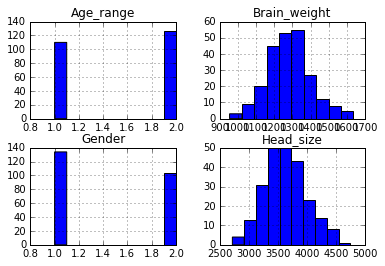

In [9]:
df.hist()

#### Isolate x and y

In [29]:
x = df['Head_size']
y = df['Brain_weight']

#### Plot y vs. x

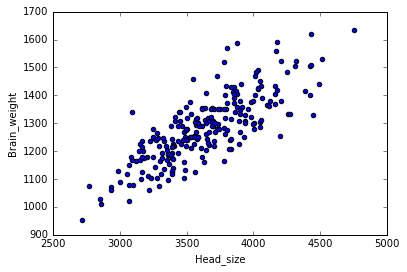

In [30]:
df.plot('Head_size', 'Brain_weight', kind='scatter')

#### Technical note: the LinearRegression class needs data to be reshaped in input

In [32]:
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


### Train regressor

#### Initialise model

In [33]:
model = LinearRegression()

#### Train model

In [34]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Plot the resulting line and print fitted parameters

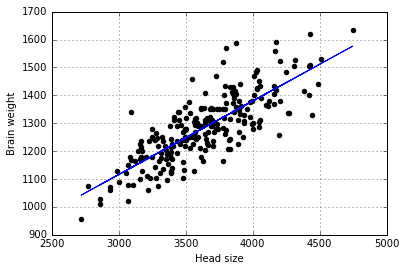

Slope of the fit:  [[ 0.26342934]]
Intercept of the fit:  [ 325.57342105]


In [42]:
# Plot the data and the fitting line
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='blue')
plt.grid()
plt.xlabel('Head size')
plt.ylabel('Brain weight')
plt.show()

# Display the fitted slope and intercept of the fitting line
print 'Slope of the fit: ', model.coef_
print 'Intercept of the fit: ', model.intercept_

#### Predict on a new x!

In [43]:
new_x = 4200

model.predict(new_x)

array([[ 1431.9766469]])

### Performance 

In [39]:
# Separate train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Shape of the test dataset

In [45]:
x_test.shape

(48, 1)

In [54]:
# Re-instantiate model, fit on train, predict on test, see performance

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(y_test)

In [56]:
print model.score(x_test, y_test)

0.562099143352


> TODO: any difference if we select the gender beforehand?

## Multiple Regression

### Read and analyse dataset

#### Read the file, head and describe dataframe

In [57]:
df = pd.read_csv(filename_breakfast)

In [58]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [63]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#### Histogram the data

[]

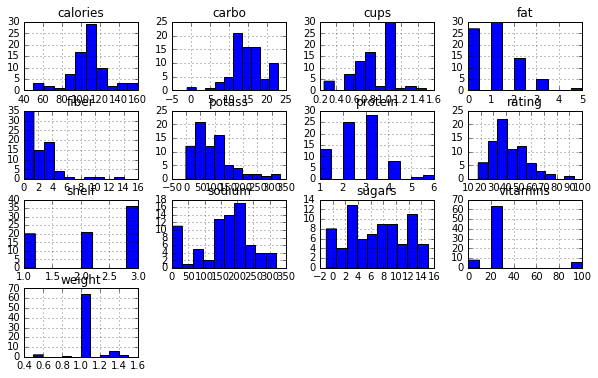

In [62]:
df.hist()
plt.plot()

#### Isolate (a choice of) X and y

In [70]:
X = df[['vitamins', 'calories', 'fat', 'fiber']]
y = df['rating']

### Performance of model

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(x_train, y_train)

print model.score(x_test, y_test)

0.81743156413


## References

### Simple Regression
---

* [The head dataset can be found here](http://www.stat.ufl.edu/~winner/datasets.html)
* [The original paper of the head dataset](http://www.jstor.org/stable/2331533?seq=1#page_scan_tab_contents)

### Multiple Regression
---

* [The breakfast dataset](http://lib.stat.cmu.edu/DASL/Datafiles/Cereals.html)